<a href="https://colab.research.google.com/github/naphatsiri/DADS7203-Word-Embedding/blob/main/6620412003_NIDA-Word-Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gensim

In [2]:
import pandas as pd
import numpy  as np

In [3]:
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Preparing and Cleansing data

path = 'https://raw.githubusercontent.com/naphatsiri/DADS7203-Word-Embedding/refs/heads/main/TaylorSwift.csv'

df = pd.read_csv(path)

df

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...
...,...,...,...,...,...,...,...
332,333,Taylor Swift,Christmas Tree Farm (Recorded Live at the 2019...,NaN,2020,19/12/2020,spoken it's jingleball theres santa hats ever...
333,334,Taylor Swift,Evermore [Forward],NaN,2020,11/12/2020,to put it plainly we just couldnt stop writing...
334,335,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020,11/12/2020,zwrotka siedzę i patrzę jak czytasz z głową p...
335,336,Taylor Swift,​r​ight where you left me,evermore (Japanese Edition),2021,7/1/2021,friends break up friends get married strangers...


In [6]:
#Cleaned all rows that column 'Lyric' is N/A
df_cleaned1 = df.dropna(subset = ['Lyric'])

df_cleaned1

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...
...,...,...,...,...,...,...,...
332,333,Taylor Swift,Christmas Tree Farm (Recorded Live at the 2019...,NaN,2020,19/12/2020,spoken it's jingleball theres santa hats ever...
333,334,Taylor Swift,Evermore [Forward],NaN,2020,11/12/2020,to put it plainly we just couldnt stop writing...
334,335,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020,11/12/2020,zwrotka siedzę i patrzę jak czytasz z głową p...
335,336,Taylor Swift,​r​ight where you left me,evermore (Japanese Edition),2021,7/1/2021,friends break up friends get married strangers...


In [7]:
#To check if there is any N/A in column ?

has_na = df_cleaned1.isna().any()

print(has_na)

Unnamed: 0    False
Artist        False
Title         False
Album          True
Year          False
Date          False
Lyric         False
dtype: bool


In [8]:
#Cleaned Non-Enlish data

df_cleaned2 = df_cleaned1[df_cleaned1['Lyric'].str.contains(r'[^a-zA-Z0-9 ]', '', regex=True)]

df_cleaned2

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
4,5,Taylor Swift,Teardrops on My Guitar,Taylor Swift,2006,24/10/2006,drew looks at me i fake a smile so he won't se...
...,...,...,...,...,...,...,...
331,332,Taylor Swift,The Archer (Live from Paris),Live from Paris,2020,17/5/2020,combat i'm ready for combat i say i don't want...
332,333,Taylor Swift,Christmas Tree Farm (Recorded Live at the 2019...,NaN,2020,19/12/2020,spoken it's jingleball theres santa hats ever...
334,335,Taylor Swift,Tolerate it (Polskie Tłumaczenie),NaN,2020,11/12/2020,zwrotka siedzę i patrzę jak czytasz z głową p...
335,336,Taylor Swift,​r​ight where you left me,evermore (Japanese Edition),2021,7/1/2021,friends break up friends get married strangers...


In [9]:
#Sort data into 2 models

df_cleaned2['Year'] = pd.to_numeric(df_cleaned2['Year'], errors='coerce')

df_model1 = df_cleaned2[df_cleaned2['Year'] <= 2015].sort_values(by = 'Year')
df_model2 = df_cleaned2[df_cleaned2['Year'] > 2015].sort_values(by = 'Year')

In [11]:
#Display Group 1

df_model1.head(10)

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,1,Taylor Swift,A Monster In My Closet!,NaN,2000,1/1/2000,there's a monster in my closet and i don't kno...
1,2,Taylor Swift,​epiphany (the long pond studio sessions),folklore: the long pond studio sessions (from ...,2002,25/11/2002,keep your helmet keep your life son just a fle...
2,3,Taylor Swift,Dark Blue Tennessee,2004-2005 Demo CD,2004,1/1/2004,he said i got me a nice new apartment in the c...
3,4,Taylor Swift,All Night Diner,Unreleased Songs,2005,1/1/2005,i wake up i stretch out i wonder what you're d...
16,17,Taylor Swift,Barnyard Song,Unreleased Songs,2006,24/10/2006,you turn your dial to 97 broadway acts like he...
15,16,Taylor Swift,I’d Lie,Unreleased Songs,2006,24/10/2006,i dont think that passenger seat has ever look...
14,15,Taylor Swift,A Place In This World,Taylor Swift,2006,24/10/2006,i don't know what i want so don't ask me cause...
13,14,Taylor Swift,The Outside,Taylor Swift,2006,24/10/2006,i didn't know what i would find when i went lo...
12,13,Taylor Swift,Stay Beautiful,Taylor Swift,2006,24/10/2006,corey's eyes are like a jungle he smiles it's ...
10,11,Taylor Swift,Tied Together with a Smile,2004-2005 Demo CD,2006,24/10/2006,seems the only one who doesn't see your beauty...


In [12]:
#Display Group 2

df_model2.head(10)

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
184,185,Taylor Swift,This Is What You Came For (Live),Unreleased Songs,2016,22/10/2016,baby this is what you came for lightning strik...
185,186,Taylor Swift,Taylor Swift Responds To Kanye’s ‘Famous’ Lyric,NaN,2016,18/7/2016,search where is the video of kanye telling me...
210,211,Taylor Swift,Rare Peer (Brenda Lee Tribute),Woman Walk The Line,2017,20/9/2017,i'm curled up in my mother's bed staring inten...
209,210,Taylor Swift,The Making Of A Song - ‘Gorgeous’,NaN,2017,1/11/2017,first version you're so gorgeous and i ain't...
208,209,Taylor Swift,...Ready for It? (BloodPop® Remix),NOW That’s What I Call A Workout 2019,2017,6/12/2017,knew he was a killer first time that i saw him...
206,207,Taylor Swift,“Songs Taylor Loves” Playlist,NaN,2017,29/9/2017,september 07 uploadbanks crowded places the n...
204,205,Taylor Swift,If You’re Anything Like Me [Poem],reputation,2017,10/11/2017,if you're anything like me you bite your nails...
203,204,Taylor Swift,Reputation [Prologue],reputation,2017,10/11/2017,here's something i've learned about people we...
201,202,Taylor Swift,Dancing with Our Hands Tied,reputation,2017,10/11/2017,i i loved you in secret first sight yeah we lo...
200,201,Taylor Swift,This is Why We Can’t Have Nice Things,reputation,2017,10/11/2017,it was so nice throwing big parties jump into ...


In [13]:
#Group 1 ; ['Year'] <= 2015

# Create the list of list format of the custom corpus for gensim modeling
# In this case, we splited column 'Lyric' in order to use as modeling input

sent1 = [row.split(' ') for row in df_model1['Lyric']]

sent1[:1]

[["there's",
  'a',
  'monster',
  'in',
  'my',
  'closet',
  'and',
  'i',
  "don't",
  'know',
  'what',
  'to',
  'do',
  'have',
  'you',
  'ever',
  'seen',
  'him',
  'has',
  'he',
  'ever',
  'pounced',
  'on',
  'you',
  'i',
  'wonder',
  'what',
  'he',
  'looks',
  'like',
  'is',
  'he',
  'purple',
  'with',
  'red',
  'eyes',
  'i',
  'wonder',
  'what',
  'he',
  'likes',
  'to',
  'eat',
  'what',
  'about',
  'his',
  'size',
  'tonight',
  "i'm",
  'gonna',
  'catch',
  'him',
  "i'll",
  'set',
  'a',
  'real',
  'big',
  'trap',
  'then',
  "i'll",
  'train',
  'him',
  'really',
  'well',
  "he'll",
  'answer',
  'when',
  'i',
  'clap',
  '',
  'when',
  'i',
  'looked',
  'up',
  'in',
  'that',
  'closet',
  'there',
  'was',
  'nothing',
  'there',
  'but',
  'stuff',
  'i',
  'know',
  'that',
  "monster's",
  'in',
  'there',
  'i',
  'heard',
  'him',
  'huff',
  'and',
  'puff',
  'could',
  'it',
  'be',
  'he',
  'wants',
  'to',
  'eat',
  'me',
  'may

In [15]:
#Group 2 ; ['Year'] > 2015

# Create the list of list format of the custom corpus for gensim modeling
# In this case, we splited column 'Lyric' in order to use as modeling input

sent2 = [row.split(' ') for row in df_model2['Lyric']]

sent2[:1]

[['baby',
  'this',
  'is',
  'what',
  'you',
  'came',
  'for',
  'lightning',
  'strikes',
  'every',
  'time',
  'she',
  'moves',
  'and',
  "everybody's",
  'watching',
  'her',
  'but',
  "she's",
  'looking',
  'at',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  '',
  'baby',
  'this',
  'is',
  'what',
  'you',
  'came',
  'for',
  'lightning',
  'strikes',
  'every',
  'time',
  'she',
  'moves',
  'and',
  "everybody's",
  'watching',
  'her',
  'but',
  "she's",
  'looking',
  'at',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'you',
  'oh',
  'oh',
  'oh',
  'oh',
  '',
  'verse',
  'we',
  'go',
  'fast',
  'with',
  'the',
  'game',
  'we',
  'play',
  'who',
  'knows',
  'why',
  "it's",
  'gotta',
  'be',
  'this',
  'way',
  'we',
  'say',
  'nothing',
  'more',

In [18]:
#Apply 'most_similar' function into Group1 and Group2

model1 = Word2Vec(sent1, min_count = 1,workers = 3, window =3, sg = 1)
model2 = Word2Vec(sent2, min_count = 1,workers = 3, window =3, sg = 1)

print(f'Group 1 Word2Vec model informantion \n{model1}')
print()
print(f'Group 2 Word2Vec model informantion \n{model2}')

Group 1 Word2Vec model informantion 
Word2Vec<vocab=3526, vector_size=100, alpha=0.025>

Group 2 Word2Vec model informantion 
Word2Vec<vocab=4703, vector_size=100, alpha=0.025>


In [19]:
#Group 1
#Top 5 most similarity of 'love', 'break', 'perfect', 'night' and 'heart'

simi_love = model1.wv.most_similar('love')[:5]
simi_break = model1.wv.most_similar('break')[:5]
simi_perfect = model1.wv.most_similar('perfect')[:5]
simi_night = model1.wv.most_similar('night')[:5]
simi_heart = model1.wv.most_similar('heart')[:5]

print(simi_love)
print(simi_break)
print(simi_perfect)
print(simi_night)
print(simi_heart)


[('this', 0.9039369225502014), ('is', 0.8849450945854187), ('sparkling', 0.8697710633277893), ('true', 0.8625816106796265), ('take', 0.8614410161972046)]
[('dance', 0.9696224927902222), ('scar', 0.9659479260444641), ('cry', 0.962414562702179), ('reasons', 0.9622691869735718), ('afraid', 0.9622243642807007)]
[('any', 0.9968472123146057), ('underestimated', 0.9960716962814331), ('second', 0.9959303736686707), ('minute', 0.9957877397537231), ('less', 0.9957807064056396)]
[('first', 0.9484259486198425), ('time', 0.9266000986099243), ('last', 0.9229776263237), ('gave', 0.9193377494812012), ('kiss', 0.9188357591629028)]
[('head', 0.977972686290741), ('life', 0.9739301800727844), ('standing', 0.9720503091812134), ('wasted', 0.9700841307640076), ('hand', 0.9690927863121033)]


In [24]:
# Convert to DataFrame
df1 = pd.DataFrame({
    'love_word': [word for word, _ in simi_love],
    'love_score': [score for _, score in simi_love],
    'break_word': [word for word, _ in simi_break],
    'break_score': [score for _, score in simi_break],
    'perfect_word': [word for word, _ in simi_perfect],
    'perfect_score': [score for _, score in simi_perfect],
    'night_word': [word for word, _ in simi_night],
    'night_score': [score for _, score in simi_night],
    'heart_word': [word for word, _ in simi_heart],
    'heart_score': [score for _, score in simi_heart]
})

# Display DataFrame
df1


,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
0,this,0.903937,dance,0.969622,any,0.996847,first,0.948426,head,0.977973
1,is,0.884945,scar,0.965948,underestimated,0.996072,time,0.926600,life,0.973930
2,sparkling,0.869771,cry,0.962415,second,0.995930,last,0.922978,standing,0.972050
3,true,0.862582,reasons,0.962269,minute,0.995788,gave,0.919338,wasted,0.970084
4,take,0.861441,afraid,0.962224,less,0.995781,kiss,0.918836,hand,0.969093


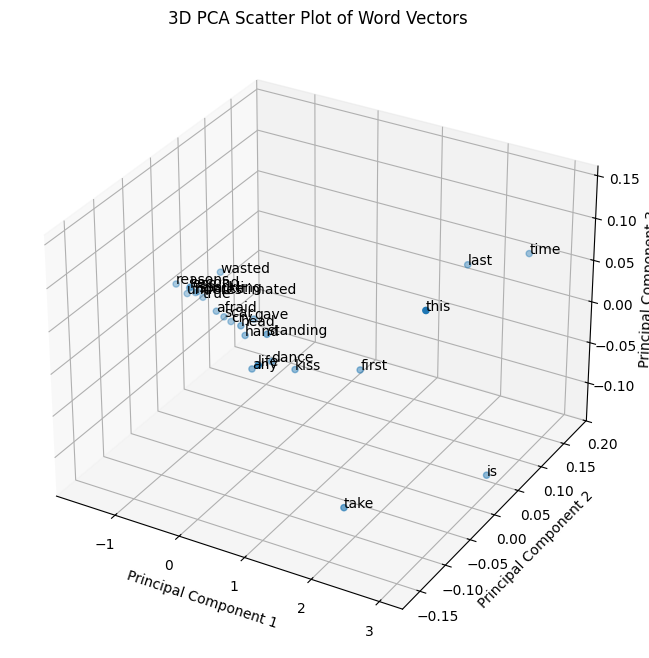

In [28]:
# 3D Scatter plot for Group 1

import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

# Combine all similar words into a single list
plot_words = []
for simi_list in [simi_love, simi_break, simi_perfect, simi_night, simi_heart]:
    plot_words.extend([word for word, score in simi_list])

# Remove duplicate words while preserving order
plot_words = list(dict.fromkeys(plot_words))

try:
    word_matrix = np.array([model1.wv[word] for word in plot_words])
    num_components = 3
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(word_matrix)

    fig = pyplot.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='o')

    for i, word in enumerate(plot_words):
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], word)

    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title("3D PCA Scatter Plot of Word Vectors")
    pyplot.show()

except KeyError as e:
    print(f"Error: Word '{e}' not found in the model's vocabulary. Please check your input words.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")


In [30]:
#Group 2
#Top 5 most similaritu of 'love', 'break', 'perfect', 'night' and 'heart'

simi_love2 = model2.wv.most_similar('love')[:5]
simi_break2 = model2.wv.most_similar('break')[:5]
simi_perfect2 = model2.wv.most_similar('perfect')[:5]
simi_night2 = model2.wv.most_similar('night')[:5]
simi_heart2 = model2.wv.most_similar('heart')[:5]

print(simi_love2)
print(simi_break2)
print(simi_perfect2)
print(simi_night2)
print(simi_heart2)

[("nobody's", 0.9686026573181152), ('gonna', 0.9679171442985535), ('thought', 0.9662443995475769), ('hate', 0.9596755504608154), ('forgot', 0.9593583941459656)]
[('must', 0.9921119809150696), ("baby's", 0.9920855760574341), ('watch', 0.9918096661567688), ('shining', 0.9917525053024292), ('happened', 0.991132915019989)]
[('gold', 0.9969019889831543), ('queen', 0.9966566562652588), ('daydream', 0.9964974522590637), ('ghost', 0.9960800409317017), ('cry', 0.9960305094718933)]
[('middle', 0.9838037490844727), ('dreams', 0.980873167514801), ('eeheeheeh', 0.9649520516395569), ('rest', 0.9500040411949158), ('heart', 0.9457041621208191)]
[('body', 0.9896131157875061), ('drug', 0.9877858757972717), ('tears', 0.9874367713928223), ("here's", 0.9869183897972107), ('mind', 0.9866495728492737)]


In [31]:
# Convert to DataFrame
df2 = pd.DataFrame({
    'love_word': [word for word, _ in simi_love2],
    'love_score': [score for _, score in simi_love2],
    'break_word': [word for word, _ in simi_break2],
    'break_score': [score for _, score in simi_break2],
    'perfect_word': [word for word, _ in simi_perfect2],
    'perfect_score': [score for _, score in simi_perfect2],
    'night_word': [word for word, _ in simi_night2],
    'night_score': [score for _, score in simi_night2],
    'heart_word': [word for word, _ in simi_heart2],
    'heart_score': [score for _, score in simi_heart2]
})

# Display DataFrame
df2

,love_word,love_score,break_word,break_score,perfect_word,perfect_score,night_word,night_score,heart_word,heart_score
0,nobody's,0.968603,must,0.992112,gold,0.996902,middle,0.983804,body,0.989613
1,gonna,0.967917,baby's,0.992086,queen,0.996657,dreams,0.980873,drug,0.987786
2,thought,0.966244,watch,0.991810,daydream,0.996497,eeheeheeh,0.964952,tears,0.987437
3,hate,0.959676,shining,0.991753,ghost,0.996080,rest,0.950004,here's,0.986918
4,forgot,0.959358,happened,0.991133,cry,0.996031,heart,0.945704,mind,0.986650


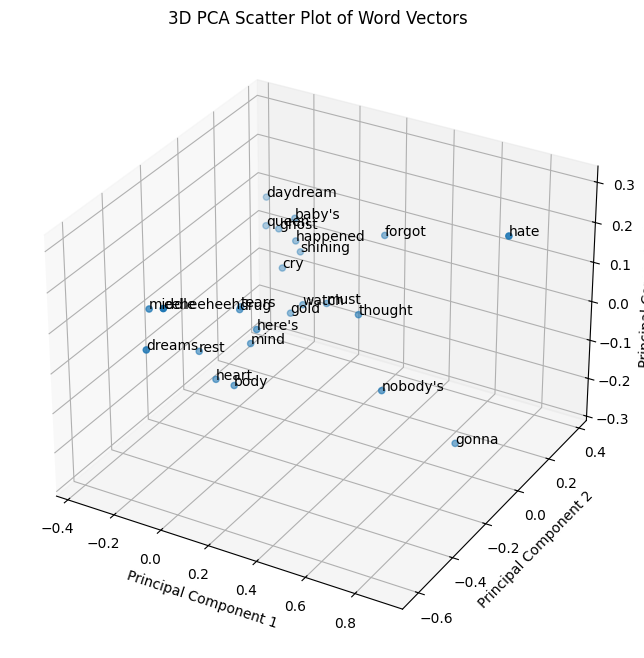

In [32]:
# 3D Scatter plot for Group 2

# Combine all similar words into a single list
plot_words = []
for simi_list in [simi_love2, simi_break2, simi_perfect2, simi_night2, simi_heart2]:
    plot_words.extend([word for word, score in simi_list])

# Remove duplicate words while preserving order
plot_words = list(dict.fromkeys(plot_words))

try:
    word_matrix = np.array([model2.wv[word] for word in plot_words])
    num_components = 3
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(word_matrix)

    fig = pyplot.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], marker='o')

    for i, word in enumerate(plot_words):
        ax.text(pca_result[i, 0], pca_result[i, 1], pca_result[i, 2], word)

    ax.set_xlabel("Principal Component 1")
    ax.set_ylabel("Principal Component 2")
    ax.set_zlabel("Principal Component 3")
    ax.set_title("3D PCA Scatter Plot of Word Vectors")
    pyplot.show()

except KeyError as e:
    print(f"Error: Word '{e}' not found in the model's vocabulary. Please check your input words.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")